In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import mlab
import matplotlib as mpl
import geopandas as gpd
import numpy as np
import matplotlib.path as mpath
import matplotlib.patches as patches

<Axes: >

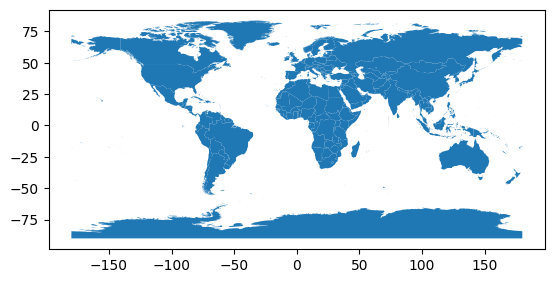

In [ ]:
map = gpd.read_file('/content/copy_4.shp')
map.drop(columns=['featurecla', 'cartodb _2'], inplace=True)
map.rename(columns={'NAME_LONG': 'country'}, inplace=True)
map['country'] = map['country'].str.lower()
map.plot()

In [ ]:
map.head()

,country,geometry
0,aruba,"POLYGON ((-69.99694 12.57758, -69.93639 12.531..."
1,afghanistan,"POLYGON ((73.19184 36.87703, 73.19184 36.87703..."
2,angola,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -..."
3,anguilla,"MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ..."
4,albania,"POLYGON ((19.74777 42.57890, 19.74601 42.57993..."


In [ ]:
df = pd.read_csv('/content/world_population_data.csv')
df['country'] = df['country'].str.lower()
df.head(15)

,rank,cca3,country,continent,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²),growth rate,world percentage
0,1,IND,india,Asia,1428627663,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590.0,481,0.81%,17.85%
1,2,CHN,china,Asia,1425671352,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961.0,151,-0.02%,17.81%
2,3,USA,united states,North America,339996563,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610.0,37,0.50%,4.25%
3,4,IDN,indonesia,Asia,277534122,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569.0,148,0.74%,3.47%
4,5,PAK,pakistan,Asia,240485658,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912.0,312,1.98%,3.00%
5,6,NGA,nigeria,Africa,223804632,218541212,208327405,183995785,160952853,122851984,95214257,72951439,55569264,923768.0,246,2.41%,2.80%
6,7,BRA,brazil,South America,216422446,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,8515767.0,26,0.52%,2.70%
7,8,BGD,bangladesh,Asia,172954319,171186372,167420951,157830000,148391139,129193327,107147651,83929765,67541860,147570.0,1329,1.03%,2.16%
8,9,RUS,russia,Europe,144444359,144713314,145617329,144668389,143242599,146844839,148005704,138257420,130093010,17098242.0,9,-0.19%,1.80%
9,10,MEX,mexico,North America,128455567,127504125,125998302,120149897,112532401,97873442,81720428,67705186,50289306,1964375.0,66,0.75%,1.60%


In [ ]:
merge = map.merge(df, on='country', how = 'left')

merge.shape[0]

255

In [ ]:
merge = merge.dropna(subset=['country'], how='all')
merge['2023 population'].min()

1935.0

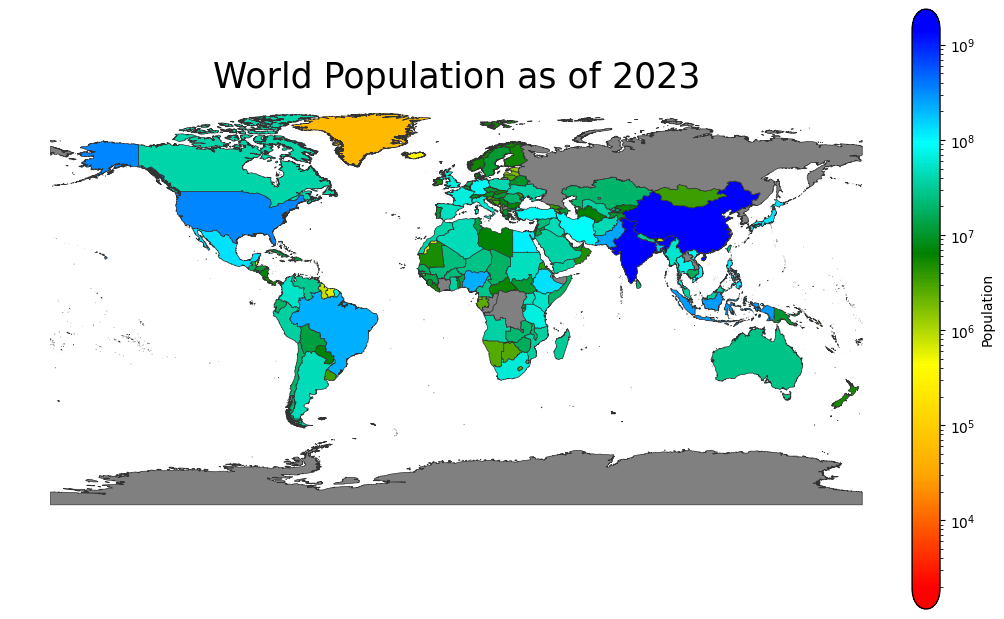

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as patches
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap, LogNorm

# Sample data and preparation (assuming gdf, custom_cmap, norm are defined)
na_color = 'grey'
vmin = 1935.0
vmax = 1428627663.0

# Create a logarithmic normalization object
norm = LogNorm(vmin=vmin, vmax=vmax)

# Define a colormap with adjusted color stops for better distribution
custom_cmap = LinearSegmentedColormap.from_list(
    'custom_colormap',
    [(0, 'red'), (0.2, 'orange'), (0.4, 'yellow'), (0.6, 'green'), (0.8, 'cyan'), (1, 'blue')],
    N=256
)
custom_cmap.set_bad(na_color)

fig, ax = plt.subplots(1, figsize=(12, 12))
ax.set_title('World Population as of 2023', fontdict={'fontsize': 25, 'fontweight': 10, 'color': 'black'}, pad=0.01)

# Create the colorbar
orientation = "vertical"  # Change to "horizontal" if needed
colorbar_fraction = 0.03  # Adjust this value to change the length of the colorbar
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=custom_cmap), ax=ax, label='Population', orientation=orientation, fraction=colorbar_fraction, pad=0.01)
cb.outline.set_visible(False)

# Extend colorbar
bot = -0.05
top = 1.05

# Upper bound
xy_upper = np.array([[0, 1], [0, top], [1, top], [1, 1]])
if orientation == "horizontal":
    xy_upper = xy_upper[:, ::-1]

color = cb.cmap(cb.norm(vmax))
patch_upper = patches.PathPatch(
    mpath.Path(xy_upper, [mpath.Path.MOVETO, mpath.Path.CURVE4, mpath.Path.CURVE4, mpath.Path.CURVE4]),
    facecolor=color,
    linewidth=0,
    antialiased=False,
    transform=cb.ax.transAxes,
    clip_on=False,
)
cb.ax.add_patch(patch_upper)

# Lower bound
xy_lower = np.array([[0, 0], [0, bot], [1, bot], [1, 0]])
if orientation == "horizontal":
    xy_lower = xy_lower[:, ::-1]

color = cb.cmap(cb.norm(vmin))
patch_lower = patches.PathPatch(
    mpath.Path(xy_lower, [mpath.Path.MOVETO, mpath.Path.CURVE4, mpath.Path.CURVE4, mpath.Path.CURVE4]),
    facecolor=color,
    linewidth=0,
    antialiased=False,
    transform=cb.ax.transAxes,
    clip_on=False,
)
cb.ax.add_patch(patch_lower)

# Outline
xy_outline = np.array([[0, 0], [0, bot], [1, bot], [1, 0], [1, 1], [1, top], [0, top], [0, 1], [0, 0]])
if orientation == "horizontal":
    xy_outline = xy_outline[:, ::-1]

curve = [mpath.Path.MOVETO, mpath.Path.CURVE4, mpath.Path.CURVE4, mpath.Path.CURVE4, mpath.Path.LINETO,
         mpath.Path.CURVE4, mpath.Path.CURVE4, mpath.Path.CURVE4, mpath.Path.LINETO]
path = mpath.Path(xy_outline, curve, closed=True)

patch_outline = patches.PathPatch(
    path, facecolor="None", lw=1, transform=cb.ax.transAxes, clip_on=False
)
cb.ax.add_patch(patch_outline)
ax.axis('off')

# Plot the data (assuming merge is defined)
merge.plot(column='2023 population', cmap=custom_cmap, norm=norm, linewidth=0.5, ax=ax, edgecolor='0.2', legend=False, missing_kwds={'color': na_color}, label='Population')

plt.show()
